In [1]:
import cv2 
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [2]:
import sys
sys.path.append("..")

In [58]:
sys.path.append("...")
from utils import list_images, show_image, read_images, add_salt_pepper_noise , add_gaussian_noise ,psnr

In [57]:
list_images('../data')

['../data\\kodim01.png',
 '../data\\kodim02.png',
 '../data\\kodim03.png',
 '../data\\kodim04.png',
 '../data\\kodim05.png',
 '../data\\kodim06.png',
 '../data\\kodim07.png',
 '../data\\kodim08.png',
 '../data\\kodim09.png',
 '../data\\kodim10.png',
 '../data\\kodim11.png',
 '../data\\kodim12.png',
 '../data\\kodim13.png',
 '../data\\kodim14.png',
 '../data\\kodim15.png',
 '../data\\kodim16.png',
 '../data\\kodim17.png',
 '../data\\kodim18.png',
 '../data\\kodim19.png',
 '../data\\kodim20.png',
 '../data\\kodim21.png',
 '../data\\kodim22.png',
 '../data\\kodim23.png',
 '../data\\kodim24.png']

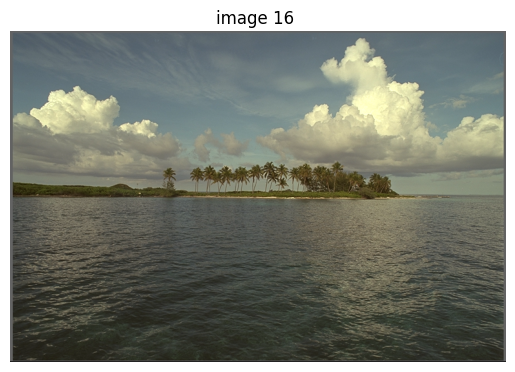

In [6]:
 
image = read_images('../data/kodim16.png')
show_image(image , 'image 16 ')


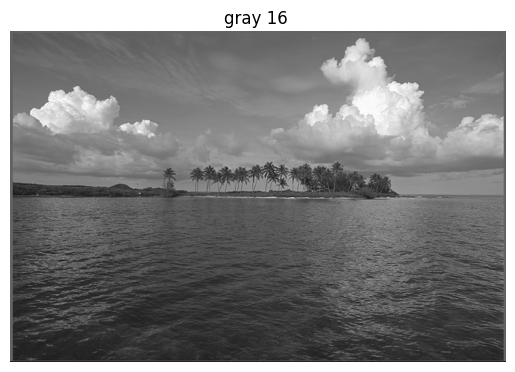

In [7]:
gray = read_images('../data/kodim16.png',gray=True)
show_image(gray , 'gray 16 ')

In [8]:
hist = cv2.calcHist([gray], [0], None, [256], [0,256])

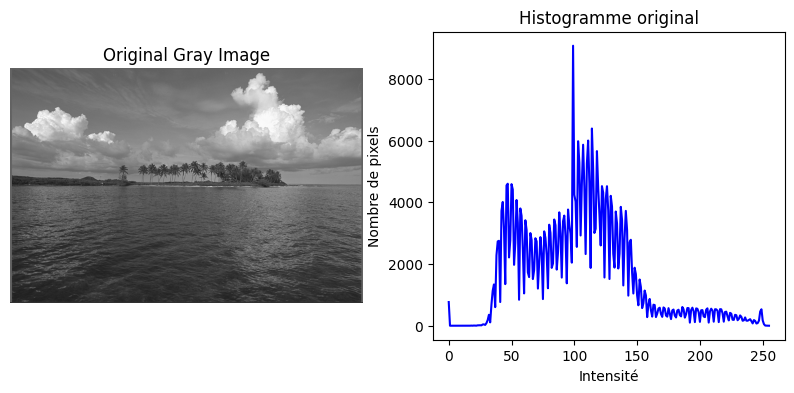

In [9]:
plt.figure(figsize=(10,4))
equalized = cv2.equalizeHist(gray)
hist_eq = cv2.calcHist([equalized], channels=[0], mask=None, histSize=[256],ranges= [0,256])

# Affichage de l'image originale gray
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/gray_image.png", dpi=300, bbox_inches='tight')


plt.subplot(1,2,2)
plt.plot(hist, color='blue')
plt.title("Histogramme original")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.savefig("../results/histograms/image16/Histogramme_original.png", dpi=300, bbox_inches='tight')
plt.show()

In [10]:
equalized = cv2.equalizeHist(gray)
hist_eq = cv2.calcHist([equalized], channels=[0], mask=None, histSize=[256],ranges= [0,256])

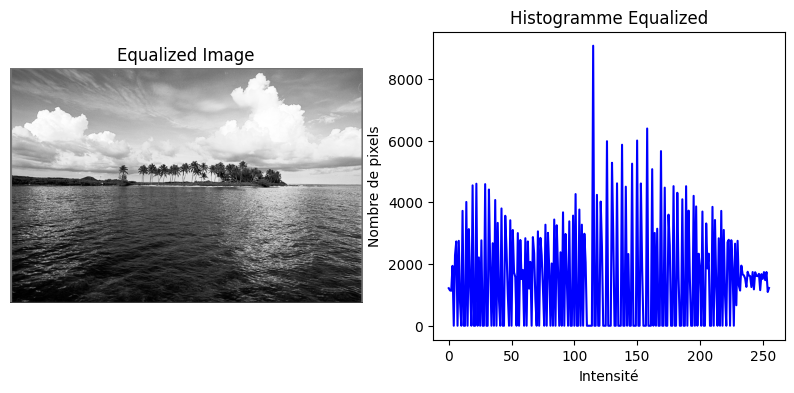

In [11]:
plt.figure(figsize=(10,4))

# Affichage de l'image originale gray
plt.subplot(1,2,1)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Equalized_Image.png", dpi=300, bbox_inches='tight')


plt.subplot(1,2,2)
plt.plot(hist_eq, color='blue')
plt.title("Histogramme Equalized")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.savefig("../results/histograms/image16/Histogramme_Equalized.png", dpi=300, bbox_inches='tight')

plt.show()


In [12]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)
hist_clahe = cv2.calcHist([clahe_img], [0], None, [256], [0,256])

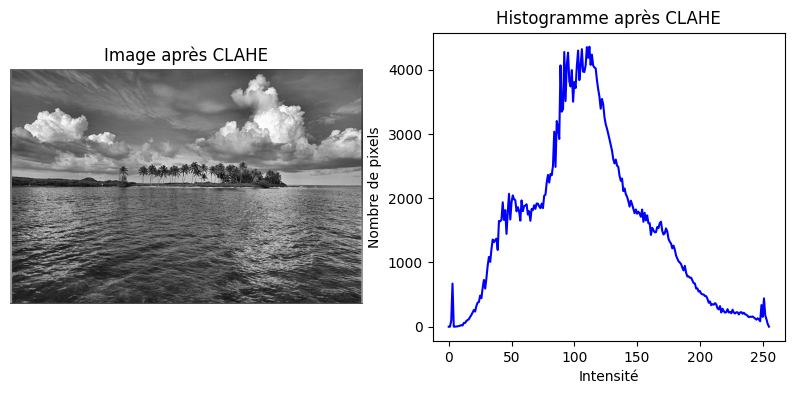

In [13]:
 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)
plt.figure(figsize=(10,4))

# Image CLAHE
plt.subplot(1,2,1)
plt.imshow(clahe_img, cmap='gray')
plt.title("Image après CLAHE")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/CLAHE_image.png", dpi=300, bbox_inches='tight')

# Histogramme CLAHE
plt.subplot(1,2,2)
plt.plot(hist_clahe, color='blue')
plt.title("Histogramme après CLAHE")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.savefig("../results/histograms/image16/Histogramme_CLAHE.png", dpi=300, bbox_inches='tight')

plt.show()


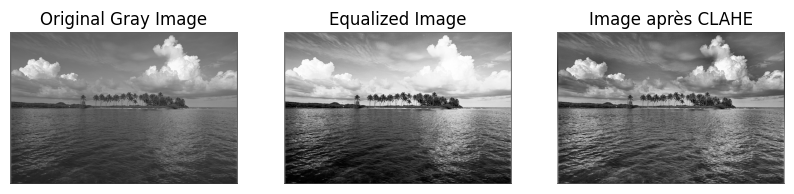

In [14]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(clahe_img, cmap='gray')
plt.title("Image après CLAHE")
plt.axis('off')

plt.show()


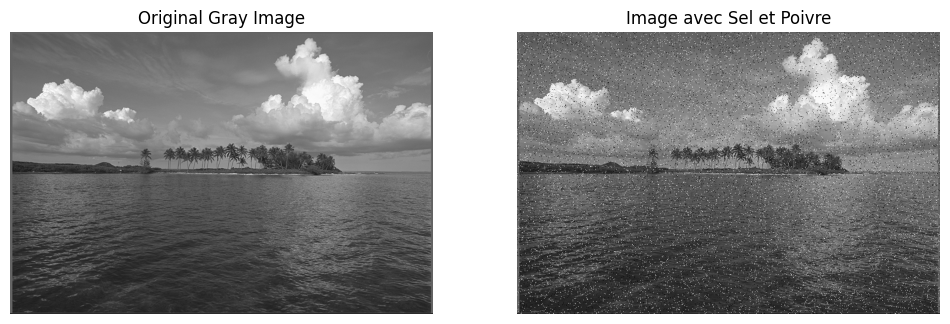

In [15]:
noisy_img_salt_pepper = add_salt_pepper_noise(gray, 0.05)

# --- Affichage ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')



plt.subplot(1,2,2)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image avec Sel et Poivre")
plt.axis('off')


plt.show()

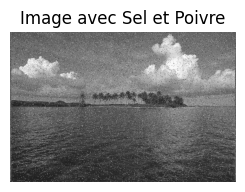

In [16]:
plt.subplot(1,2,2)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image avec Sel et Poivre")
plt.axis('off')
plt.savefig("../results/processed/noisy/image16/Sel_et_Poivre_image.png", dpi=300, bbox_inches='tight')

In [17]:
img_noisy_gauss =add_gaussian_noise(gray, mean=0, sigma=15)

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

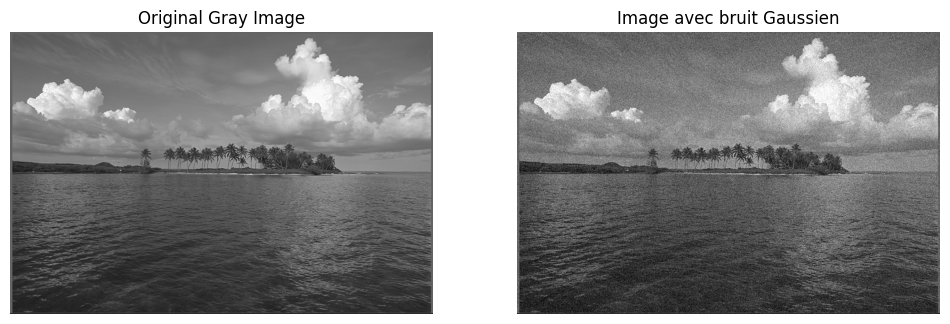

In [18]:
# --- Affichage ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image avec bruit Gaussien")
plt.axis('off')

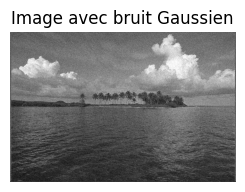

In [19]:
plt.subplot(1,2,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image avec bruit Gaussien")
plt.axis('off')
plt.savefig("../results/processed/noisy/image16/bruit_Gaussien_image.png", dpi=300, bbox_inches='tight')

In [20]:
img_blur_sp=cv2.blur(noisy_img_salt_pepper ,(3,3))
img_blur_gauss=cv2.blur(img_noisy_gauss ,(3,3))


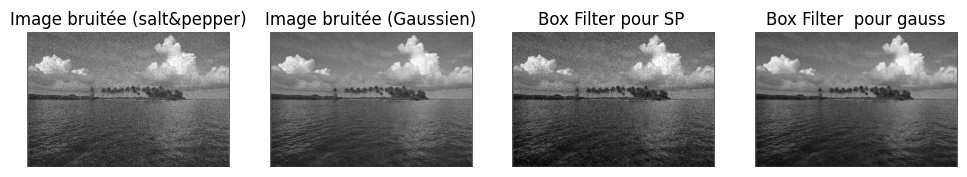

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image bruitée (salt&pepper)")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image bruitée (Gaussien)")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_blur_sp, cmap='gray')
plt.title("Box Filter pour SP ")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Box_Filter_pour_SP.png", dpi=300, bbox_inches='tight')

plt.subplot(1,4,4)
plt.imshow(img_blur_gauss, cmap='gray')
plt.title("Box Filter  pour gauss")
plt.axis('off')

plt.show()


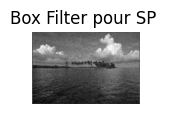

In [22]:
plt.subplot(1,4,3)
plt.imshow(img_blur_sp, cmap='gray')
plt.title("Box Filter pour SP ")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Box_Filter_pour_SP.png", dpi=300, bbox_inches='tight')


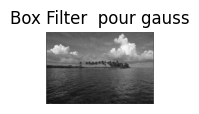

In [23]:
plt.subplot(1,4,4)
plt.imshow(img_blur_gauss, cmap='gray')
plt.title("Box Filter  pour gauss") 
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Box_Filter_pour_gauss.png", dpi=300, bbox_inches='tight')

In [24]:
img_filter_gauss_sp = cv2.GaussianBlur(noisy_img_salt_pepper, (3,3), sigmaX=1)
img_filter_gauss_for_gauss = cv2.GaussianBlur(img_noisy_gauss, (3,3), sigmaX=1)

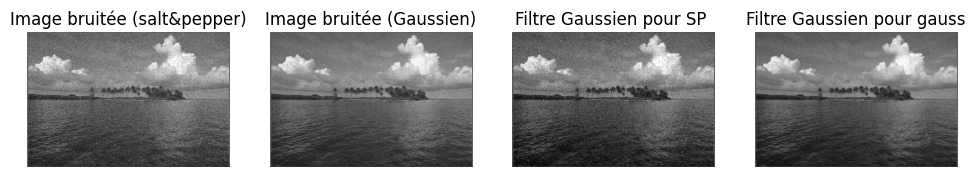

In [25]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image bruitée (salt&pepper)")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image bruitée (Gaussien)")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_filter_gauss_sp, cmap='gray')
plt.title("Filtre Gaussien pour SP ")
plt.axis('off') 

plt.subplot(1,4,4)
plt.imshow(img_filter_gauss_for_gauss, cmap='gray')
plt.title("Filtre Gaussien pour gauss")
plt.axis('off')

plt.show()


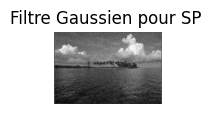

In [26]:
plt.subplot(1,4,3)
plt.imshow(img_filter_gauss_sp, cmap='gray')
plt.title("Filtre Gaussien pour SP ")
plt.axis('off') 
plt.savefig("../results/processed/filtered/image16/Filtre_Gaussien_pour_SP.png", dpi=300, bbox_inches='tight')


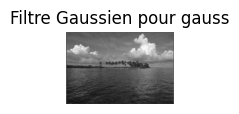

In [27]:
plt.subplot(1,4,4)
plt.imshow(img_filter_gauss_for_gauss, cmap='gray')
plt.title("Filtre Gaussien pour gauss")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Filtre_Gaussien_pour_gauss.png", dpi=300, bbox_inches='tight')

In [28]:
median_sp = cv2.medianBlur(noisy_img_salt_pepper, 3)
median_gauss = cv2.medianBlur(img_noisy_gauss, 3)

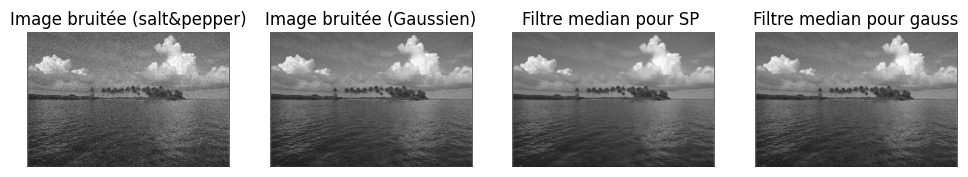

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image bruitée (salt&pepper)")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image bruitée (Gaussien)")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(median_sp, cmap='gray')
plt.title("Filtre median pour SP ")
plt.axis('off') 

plt.subplot(1,4,4)
plt.imshow(median_gauss, cmap='gray')
plt.title("Filtre median pour gauss")
plt.axis('off')

plt.show()


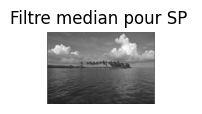

In [30]:
plt.subplot(1,4,3)
plt.imshow(median_sp, cmap='gray')
plt.title("Filtre median pour SP ")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Filtre_median_pour_SP.png", dpi=300, bbox_inches='tight') 

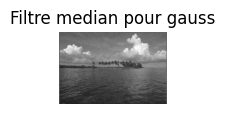

In [31]:
plt.subplot(1,4,4)
plt.imshow(median_gauss, cmap='gray')
plt.title("Filtre median pour gauss")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Filtre_median_pour_gauss.png", dpi=300, bbox_inches='tight') 

In [32]:
bilateral_sp = cv2.bilateralFilter(noisy_img_salt_pepper, d=9, sigmaColor=75, sigmaSpace=75)
bilateral_gauss = cv2.bilateralFilter(img_noisy_gauss, d=9, sigmaColor=75, sigmaSpace=75)

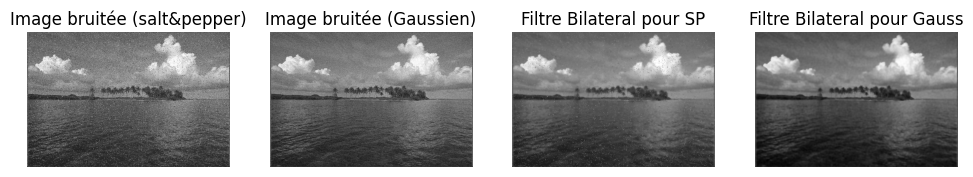

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image bruitée (salt&pepper)")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image bruitée (Gaussien)")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(bilateral_sp, cmap='gray')
plt.title("Filtre Bilateral pour SP")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(bilateral_gauss, cmap='gray')
plt.title("Filtre Bilateral pour Gauss")
plt.axis('off')
plt.show()

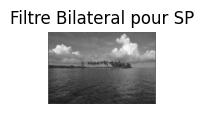

In [34]:
plt.subplot(1,4,3)
plt.imshow(bilateral_sp, cmap='gray')
plt.title("Filtre Bilateral pour SP")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Filtre_Bilateral_pour_SP.png", dpi=300, bbox_inches='tight') 

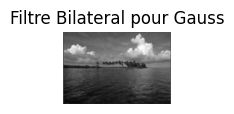

In [35]:
plt.subplot(1,4,4)
plt.imshow(bilateral_gauss, cmap='gray')
plt.title("Filtre Bilateral pour Gauss")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Filtre_Bilateral_pour_gauss.png", dpi=300, bbox_inches='tight') 
plt.show()

In [36]:
from skimage.filters.rank import median
from skimage.morphology import disk

In [37]:
nagao_sp = median(noisy_img_salt_pepper, disk(2))
nagao_gauss = median(img_noisy_gauss, disk(2))

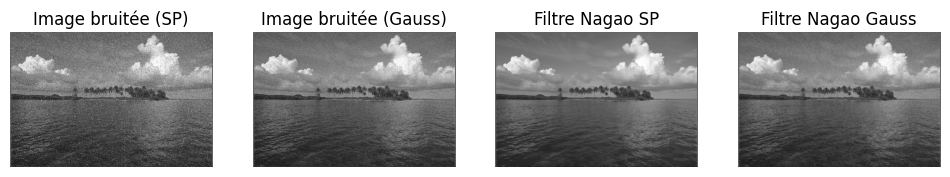

In [38]:

plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image bruitée (SP)")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image bruitée (Gauss)")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(nagao_sp, cmap='gray')
plt.title("Filtre Nagao SP")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(nagao_gauss, cmap='gray')
plt.title("Filtre Nagao Gauss")
plt.axis('off')
plt.show()


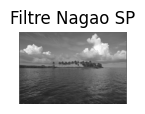

In [39]:
plt.subplot(1,4,3)
plt.imshow(nagao_sp, cmap='gray')
plt.title("Filtre Nagao SP")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Filtre_Nagao_pour_SP.png", dpi=300, bbox_inches='tight') 


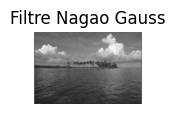

In [40]:

plt.subplot(1,4,4)
plt.imshow(nagao_gauss, cmap='gray')
plt.title("Filtre Nagao Gauss")
plt.axis('off')
plt.savefig("../results/processed/filtered/image16/Filtre_Nagao_pour_gauss.png", dpi=300, bbox_inches='tight') 
plt.show()

In [41]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

In [42]:
erosion = cv2.erode(gray, kernel, iterations=1)

In [43]:
dilation = cv2.dilate(gray, kernel, iterations=1)

In [44]:
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

In [45]:
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

In [46]:
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

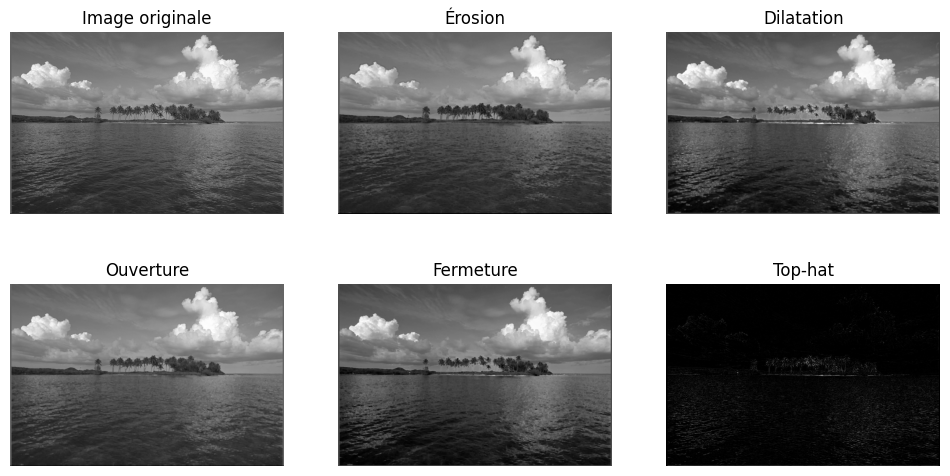

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1), plt.imshow(gray, cmap='gray'), plt.title('Image originale'), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(erosion, cmap='gray'), plt.title('Érosion'), plt.axis('off')
plt.subplot(2,3,3), plt.imshow(dilation, cmap='gray'), plt.title('Dilatation'), plt.axis('off')
plt.subplot(2,3,4), plt.imshow(opening, cmap='gray'), plt.title('Ouverture'), plt.axis('off')
plt.subplot(2,3,5), plt.imshow(closing, cmap='gray'), plt.title('Fermeture'), plt.axis('off')
plt.subplot(2,3,6), plt.imshow(tophat, cmap='gray'), plt.title('Top-hat'), plt.axis('off')
plt.savefig("../results/processed/morphology/image16/morpho_operations.png", dpi=300, bbox_inches='tight') 
plt.show()

In [48]:
# 1. Amélioration du contraste avec CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_contrast = clahe.apply(gray)

In [49]:
# 2. Filtrage (filtre médian pour bruit Sel & Poivre)
img_filtered = cv2.medianBlur(img_contrast, 3)

In [50]:
# 3. Morphologie
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
img_morph = cv2.morphologyEx(img_filtered, cv2.MORPH_OPEN, kernel)
img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, kernel)

In [51]:
# 4. Segmentation (Otsu)
_, img_segmented = cv2.threshold(img_morph, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

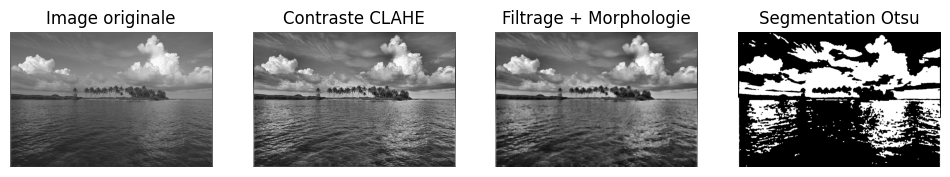

In [52]:
# Visualisation
plt.figure(figsize=(12,4))
plt.subplot(1,4,1), plt.imshow(gray, cmap='gray'), plt.title('Image originale'), plt.axis('off')
plt.subplot(1,4,2), plt.imshow(img_contrast, cmap='gray'), plt.title('Contraste CLAHE'), plt.axis('off')
plt.subplot(1,4,3), plt.imshow(img_morph, cmap='gray'), plt.title('Filtrage + Morphologie'), plt.axis('off')
plt.subplot(1,4,4), plt.imshow(img_segmented, cmap='gray'), plt.title('Segmentation Otsu'), plt.axis('off')
plt.savefig("../results/processed/morphology/image16/morphology.png", dpi=300, bbox_inches='tight') 
plt.show()


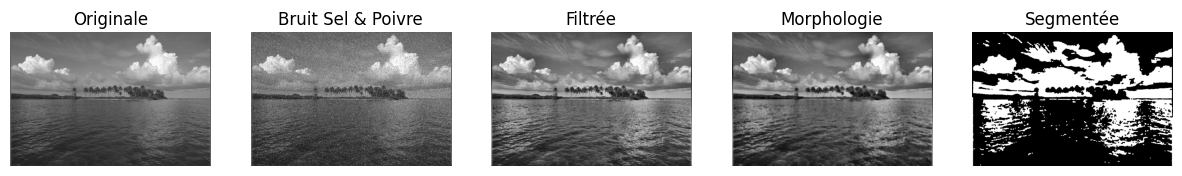

In [53]:
plt.figure(figsize=(15,4))

plt.subplot(1,5,1)
plt.imshow(gray, cmap='gray')
plt.title('Originale')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title('Bruit Sel & Poivre')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtrée')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(img_morph, cmap='gray')
plt.title('Morphologie')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(img_segmented, cmap='gray')
plt.title('Segmentée')
plt.axis('off')
plt.savefig("../results/processed/morphology/image16/pipeline_images.png", dpi=300, bbox_inches='tight') 
plt.show()


In [54]:
ssim_value = ssim(gray, img_segmented)
print("SSIM:", ssim_value)

SSIM: 0.15573456318455978


In [55]:

psnr_value = psnr(gray, img_segmented)
print("PSNR:", psnr_value)
PSNR: 27.69674246176274

PSNR: 27.99576956175516


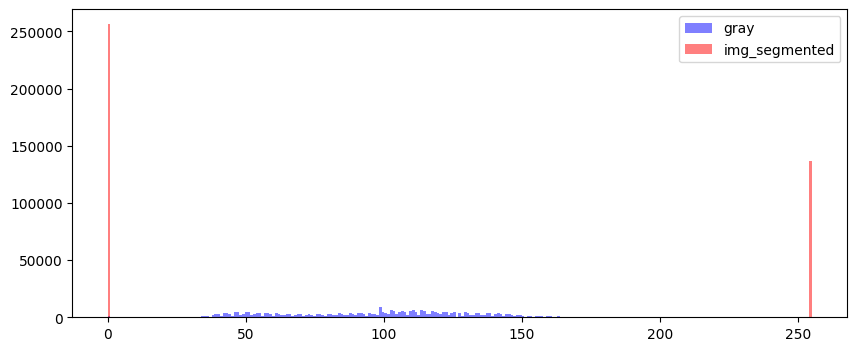

In [56]:

plt.figure(figsize=(10,4))
plt.hist(gray.ravel(), bins=256, color='blue', alpha=0.5, label='gray')
plt.hist(img_segmented.ravel(), bins=256, color='red', alpha=0.5, label='img_segmented')
plt.legend()
plt.savefig("../results/histograms/image16/hist_comparison.png", dpi=300, bbox_inches='tight') 
plt.show()
